# Tidy Data Cleaning and Visualization Script

## Overview
This script follows Tidy Data Principles to clean, transform, and visualize a dataset containing U.S. federal R&D funding over time. The key principles applied are as follows:
1. Each variable has its own column.
2. Each observation is in its own row.
3. Each type of observational unit forms its own table.

## Step 1: Load the Dataset
Reads the dataset from a CSV file.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
budget_csv = "fed_rd_year&gdp.csv"
df = pd.read_csv(budget_csv)

## Step 2: Reshape Data
Uses `melt()` to convert the dataset from wide format to long format, making sure each year and GDP value is stored in separate columns.

In [ ]:
df_melted = df.melt(id_vars=["department"], var_name="year_gdp", value_name="funding")

## Step 3: Split Year and GDP Variables
Extracts `year` and `gdp` from the `year_gdp` column using `str.split()`.

In [ ]:
df_melted[['year', 'gdp']] = df_melted['year_gdp'].str.split('_gdp', expand=True)

## Step 4: Convert Data Types
Ensures `year` is an integer and `gdp` is a float for accurate calculations.

In [ ]:

df_melted["year"] = pd.to_numeric(df_melted["year"])  # Convert year to integer
df_melted["gdp"] = pd.to_numeric(df_melted["gdp"])  # Convert GDP to float

df_tidy = df_melted.drop(columns=["year_gdp"])  # Drop redundant column

## Step 5: Handle Missing Values
Removes rows where funding data is missing to maintain data integrity.

In [ ]:
df_tidy = df_tidy.dropna(subset=["funding"])

## Step 6: Aggregate Data
Creates a pivot table that sums funding amounts per year for trend analysis.

In [ ]:
df_pivot = df_tidy.pivot_table(values="funding", index="year", aggfunc="sum")

## Step 7: Save Cleaned Data
Exports cleaned and aggregated datasets to CSV files for further use.

In [57]:
df_tidy.to_csv("tidy_fed_rd_gdp.csv", index=False) # Tidy dataset
df_pivot.to_csv("aggregated_funding.csv") # Pivot table

# Display first few rows of cleaned data to confirm success
print(df_tidy.head())
print(df_pivot.head())

  department       funding  year           gdp  funding_gdp_ratio  \
1        DOC  8.190000e+08  1976  1.790000e+12           0.000458   
2        DOD  3.569600e+10  1976  1.790000e+12           0.019942   
3        DOE  1.088200e+10  1976  1.790000e+12           0.006079   
4        DOT  1.142000e+09  1976  1.790000e+12           0.000638   
5        EPA  9.680000e+08  1976  1.790000e+12           0.000541   

   total_funding  
1   8.622700e+10  
2   8.622700e+10  
3   8.622700e+10  
4   8.622700e+10  
5   8.622700e+10  
           funding
year              
1976  8.622700e+10
1977  9.180700e+10
1978  9.486400e+10
1979  9.660100e+10
1980  9.630500e+10


## Step 8: Visualizations
The following visualizations help explore trends and relationships in the data.

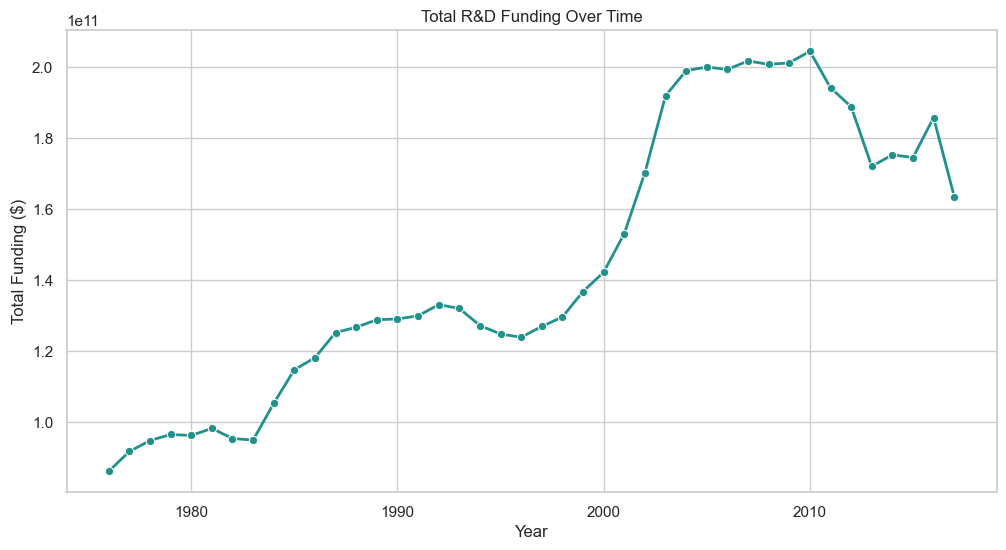

In [77]:
# Visualization 1: Line plot of total R&D funding over time
plt.figure(figsize=(12, 6))  # Set the size of the plot

# Use a single color from the Viridis palette
viridis_color = sns.color_palette("viridis", n_colors=1)[0]

sns.lineplot(
    x=df_pivot.index, 
    y=df_pivot["funding"], 
    marker="o", 
    linewidth=2, 
    color=viridis_color  # Apply the Viridis color
)

plt.title("Total R&D Funding Over Time")  # Set the title of the plot
plt.xlabel("Year")  # Set the label for the x-axis
plt.ylabel("Total Funding ($)")  # Set the label for the y-axis
plt.grid(True)  # Add a grid to the plot
plt.show()  # Display the plot

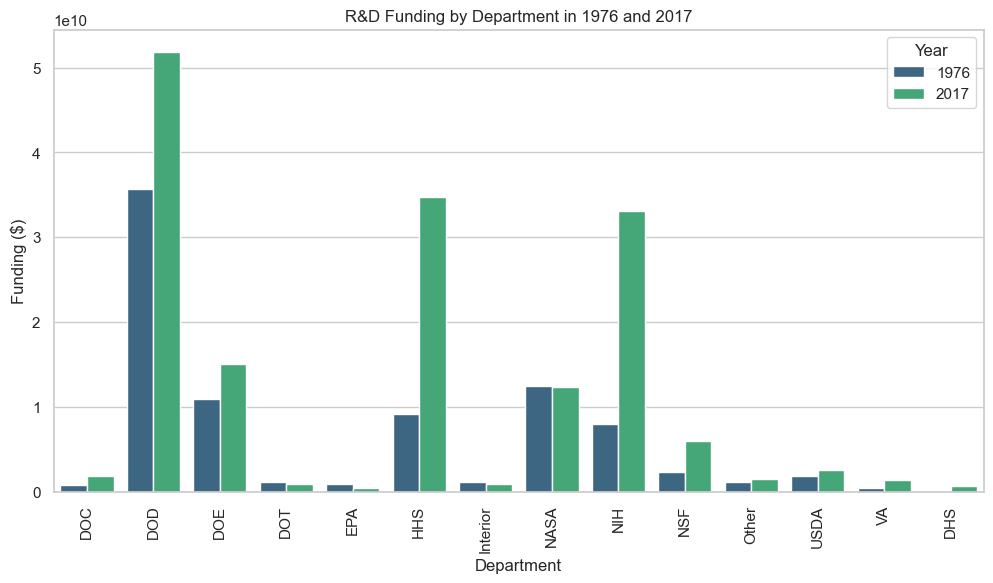

In [76]:
# Visualization 2: Bar chart of R&D funding per department for the first and most recent year
plt.figure(figsize=(12, 6))  # Set figure size
first_year = df_tidy["year"].min()  # Get the first year in the dataset
latest_year = df_tidy["year"].max()  # Get the latest year in the dataset
first_year_data = df_tidy[df_tidy["year"] == first_year]  # Filter data for the first year
latest_year_data = df_tidy[df_tidy["year"] == latest_year]  # Filter data for the latest year
combined_data = pd.concat([first_year_data, latest_year_data])  # Combine data for both years

# Use the Viridis color palette
viridis_palette = sns.color_palette("viridis", n_colors=2)

sns.barplot(
    x=combined_data["department"],
    y=combined_data["funding"],
    hue=combined_data["year"],
    palette=viridis_palette  # Apply the Viridis palette
)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title(f"R&D Funding by Department in {first_year} and {latest_year}")  # Set title
plt.xlabel("Department")  # Set x-axis label
plt.ylabel("Funding ($)")  # Set y-axis label
plt.legend(title="Year")  # Add legend with title
plt.show()  # Display plot

<Figure size 1200x600 with 0 Axes>

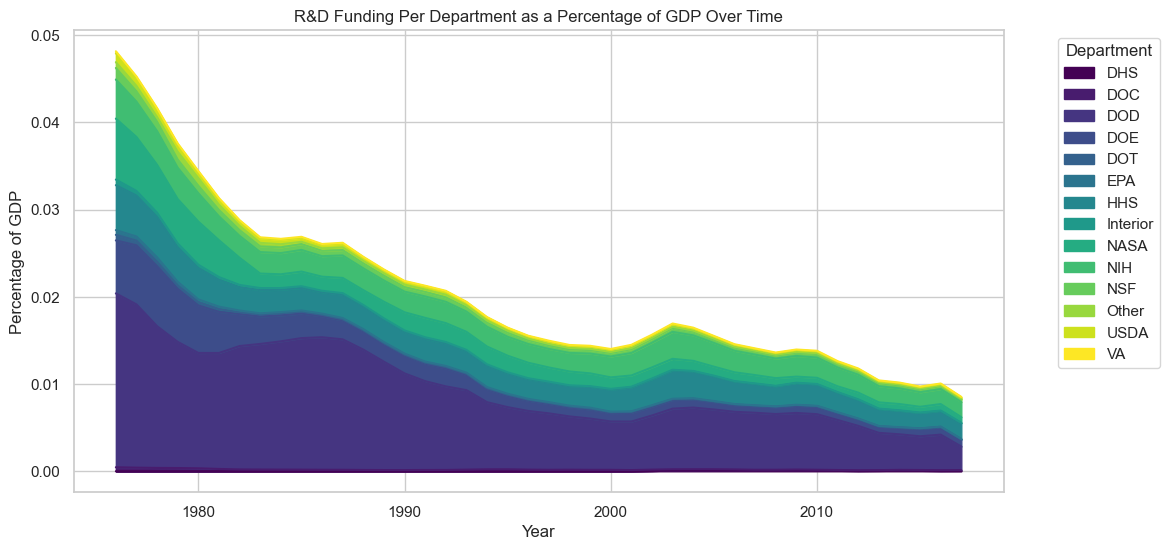

In [74]:
# Visualization 3: Streamgraph - Percentage of total gdp per department over time
plt.figure(figsize=(12, 6))

df_percentage = df_tidy.copy() # Create a copy of the tidy dataset to not modify the original
df_percentage["funding_gdp_ratio"] = df_percentage["funding"] / df_percentage["gdp"] # Calculate the funding as a percentage of GDP
df_stream = df_percentage.pivot(index="year", columns="department", values="funding_gdp_ratio").fillna(0) # Pivot the data

df_stream.plot(kind="area", stacked=True, colormap="viridis", figsize=(12, 6)) # Create the streamgraph
plt.title("R&D Funding Per Department as a Percentage of GDP Over Time") # Add title
plt.xlabel("Year") # Add x-axis label
plt.ylabel("Percentage of GDP") # Add y-axis label
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend
plt.show() # Display the plot

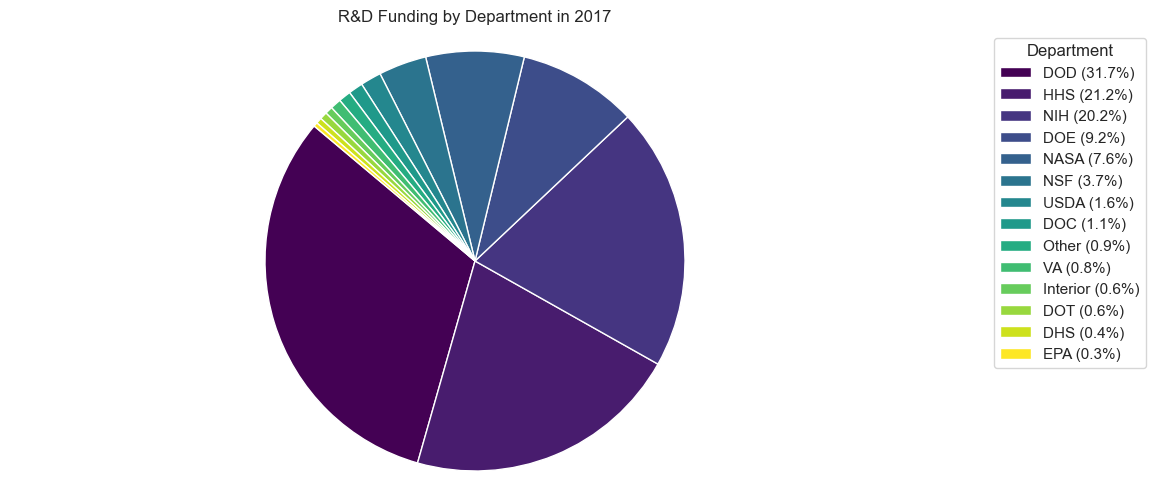

In [78]:
# Visualization 4: Pie chart of R&D funding by department in 2017
plt.figure(figsize=(12, 6)) # Set the size of the plot
year_2017_data = df_tidy[df_tidy["year"] == 2017].sort_values(by="funding", ascending=False) # Filter data for 2017 and sort by funding
colors = plt.cm.viridis(np.linspace(0, 1, len(year_2017_data))) # Generate colors for the pie chart
funding_values = year_2017_data["funding"] # Get the funding values
labels = [f"{dept} ({funding/sum(funding_values)*100:.1f}%)" for dept, funding in zip(year_2017_data["department"], funding_values)] # Create labels for the pie chart

plt.pie(funding_values, startangle=140, colors=colors) # Create the pie chart
plt.title("R&D Funding by Department in 2017") # Set the title of the plot
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(labels, title="Department", bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend
plt.show() # Display the plot